# Decision Trees

In [51]:
# Common imports
import numpy as np

np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
mpl.rc('figure', figsize=(12, 6))

# 분류

## Tree 학습과 시각화

In [21]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

In [24]:
iris = load_iris()

In [25]:
iris.data[:3]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2]])

Petal length, petal width 를 사용한다.

In [27]:
X = iris.data[:, 2:]
y = iris.target

In [29]:
X[:3]

array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2]])

학습셋과 테스트셋을 나누지 않고, 트리의 시각화를 살펴보겠습니다.

In [41]:
# Max depth를 2로 설정
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

트리를 그려보기 위해서, `graphviz`를 활용합니다.

In [37]:
from sklearn.tree import export_graphviz
from graphviz import Source
from IPython.display import SVG
from IPython.display import display

graph = Source(export_graphviz(
        tree_clf,
        out_file=None,
        feature_names=iris.feature_names[2:],
        class_names=iris.target_names,
        rounded=True,
        filled=True))

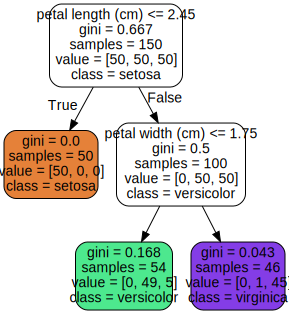

In [38]:
SVG(graph.pipe(format='svg'))

- sample
- value
- gini
 - gini가 0인 경우는?

Question) 새로운 샘플에 대하여 분류를 적용
- 꽆 잎의 길이가 2.45cm 보다 작은 경우?
- 꽃 잎의 길이가 2.45cm 보다 큰 경우?
 - 꽃 잎의 넓이가 1.75cm 보다 작은 경우?
 - 꽃 잎의 넓이가 1.75cm 보다 큰 경우?

결정 트리의 여러 장점 중 하나는 데이터 전처리가 거의 필요하지 않다는 것이다. <font color=red>특히 특성의 스케일을 맞추거나 평균을 원점에 맞추는 작업이 필요하지 않다.</font>

Sklearn은 binary tree만 만드는 CART 알고리즘을 사용한다. Leaf node 외의 모든 노드는 자식 노드를 두 개씩 가진다(질문에 대한 답은 Yes, No). 하지만 ID3 같은 알고리즘은 둘 이상의 자식 노드를 가진 결정 트리를 만들 수 있다.

결정 트리의 경계를 살펴보자.

In [58]:
x1.ravel()

array([0.        , 0.07575758, 0.15151515, ..., 7.34848485, 7.42424242,
       7.5       ])

Text(4.25,0.5,'(Depth=2)')

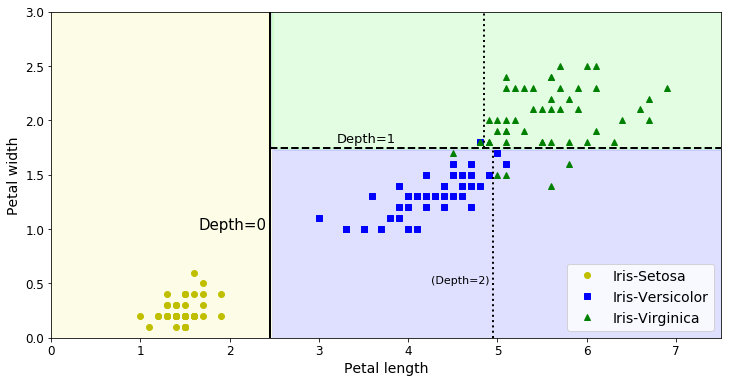

In [85]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    # axes는 x축과 y축을 의미한다. 100개씩 segmentation 한다.
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    # Pred 값을 구한다.
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris-Setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris-Versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris-Virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

plot_decision_boundary(tree_clf, X, y, legend=True)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.65, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(4.25, 0.5, "(Depth=2)", fontsize=11)

**모델 해석 : 화이트박스와 블랙박스**

결정 트리는 매우 직관적이고 결정 방식을 이해하기 쉽다. 이런 모델을 화이트 박스(white box) 모델이라고 한다. 반대로 랜덤 포레스트, 신경망은 블랙 박스(black box) 모델이라고 한다. 이 알고리즘들은 성능이 뛰어나고 예측을 만드는 연산 과정을 쉽게 확인할 수 있다. 그렇지만 왜 그런 예측을 만드는지는 쉽게 설명하기 어렵다. 

## Decision tree를 이용해 예측하기

In [72]:
# 각 종에 대한 확률값을 구해준다.
tree_clf.predict_proba([[5, 1.5]])

array([[0.        , 0.90740741, 0.09259259]])

In [73]:
tree_clf.predict([[5, 1.5]])

array([1])

#### (연습) 아래의 코드를 이용하여 wine 데이터를 로딩한다. 그 후, (1) 결정 트리를 시각화 한다. (2) 결정 경계를 시각화 한다.
- `data = load_wine()`
- feature는 *alcohol*, *proline*를 사용한다.

## 트리의 불안정성 (Sensitivity to training set details)

In [117]:
X[(X[:, 1]==X[:, 1][y==1].max()) & (y==1)] # widest Iris-Versicolor flower

IndexError: index 1 is out of bounds for axis 1 with size 1

In [86]:
# Versicolor에서 꽃잎의 width가 가장 큰 데이터를 제외하고 학습한다. 
# 트리가 학습셋에 민감하다는 것을 보여주기 위함이다.
not_widest_versicolor = (X[:, 1]!=1.8) | (y==2)
X_tweaked = X[not_widest_versicolor]
y_tweaked = y[not_widest_versicolor]

tree_clf_tweaked = DecisionTreeClassifier(max_depth=2, random_state=40)
tree_clf_tweaked.fit(X_tweaked, y_tweaked)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=40,
            splitter='best')

Text(1,1.8,'Depth=1')

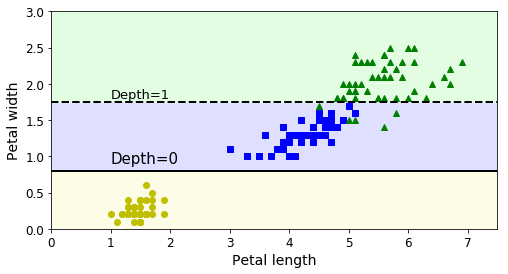

In [87]:
plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf_tweaked, X_tweaked, y_tweaked, legend=False)
plt.plot([0, 7.5], [0.8, 0.8], "k-", linewidth=2)
plt.plot([0, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.text(1.0, 0.9, "Depth=0", fontsize=15)
plt.text(1.0, 1.80, "Depth=1", fontsize=13)

##  규제화

결정 트리는 훈련 데이터에 대한 제약사항이 거의 없다. 따라서 제한을 두지 않으면 트리가 훈련 데이터에 아주 가깝게 맞추려고 해서 대부분 과대적합되기 쉽다. 결정 트리는 모델 파라미터가 전혀 없는 것이 아니라, 훈련되기 전에 파라미터 수가 결정되지 않는 것이다. 훈련되기 전에 파라미터 수가 결정되지 않기 때문에 non-parametric model이라고 한다. 모델 구조가 데이터에 맞춰져서 고정되지 않고 자유롭다. 반대로 선형 모델 같은 parametric model은 미리 정의된 모델 파라미터 수를 가지므로 자유도가 제한되고 과대적합 될 위험이 줄어든다.

훈련 데이터에 대한 과대적합을 피하기 위해 학습할 때 결정 트리의 자유도를 제한할 필요가 있다. 이것을 규제라 한다. 규제 매개변수는 사용하는 알고리즘에 따라 다르지만, 보통 적어도 결정 트리의 최대 깊이는 제어할 수 있다. Sklearn에서는 *max_depth*를 조절하여 트리를 규제할 수 있다.

또한
 - *min_samples_split*
 - *min_samples_leaf*
 - *min_weight_fraction_leaf*
 - *max_leaf_node*
 
도 모델의 규제를 조절하는 파라미터이다.

*make_moon* 을 로드하여 분석해보자. 간단하게 `min_samples_leaf`를 이용하여 모델을 규제하자.

In [88]:
from sklearn.datasets import make_moons
# sample을 100개만 가지고 올 것이다.
Xm, ym = make_moons(n_samples=100, noise=0.25, random_state=53)

Text(0.5,1,'min_samples_leaf = 4')

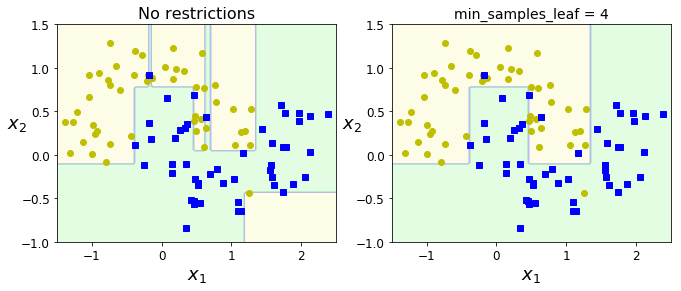

In [89]:
deep_tree_clf1 = DecisionTreeClassifier(random_state=42)
# min_samples_leaf를 이용하여 규제를 한다.
deep_tree_clf2 = DecisionTreeClassifier(min_samples_leaf=4, random_state=42)
deep_tree_clf1.fit(Xm, ym)
deep_tree_clf2.fit(Xm, ym)

plt.figure(figsize=(11, 4))
plt.subplot(121)
plot_decision_boundary(deep_tree_clf1, Xm, ym, axes=[-1.5, 2.5, -1, 1.5], iris=False)
plt.title("No restrictions", fontsize=16)
plt.subplot(122)
plot_decision_boundary(deep_tree_clf2, Xm, ym, axes=[-1.5, 2.5, -1, 1.5], iris=False)
plt.title("min_samples_leaf = {}".format(deep_tree_clf2.min_samples_leaf), fontsize=14)

# 회귀

$$y = 4 \times (x - 0.5)^2 + \text{noise}$$

In [90]:
# Quadratic training set + noise
np.random.seed(42)
m = 200
X = np.random.rand(m, 1)
y = 4 * (X - 0.5) ** 2
y = y + np.random.randn(m, 1) / 10

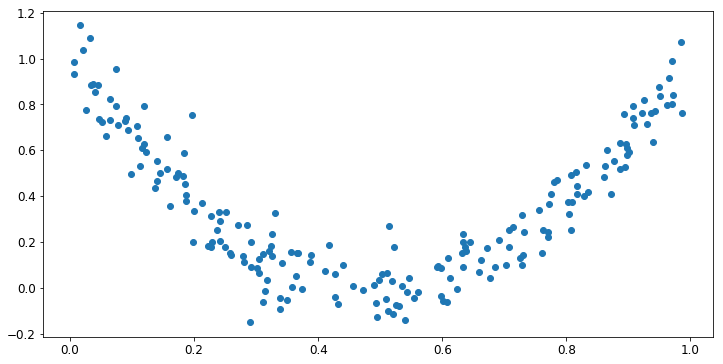

In [93]:
plt.plot(X, y, 'o')

In [100]:
from sklearn.tree import DecisionTreeRegressor

# max_depth=2
tree_reg1 = DecisionTreeRegressor(random_state=42, max_depth=2)
# max_depth=3
tree_reg2 = DecisionTreeRegressor(random_state=42, max_depth=3)
tree_reg1.fit(X, y)
tree_reg2.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=42, splitter='best')

In [105]:
graph1 = Source(export_graphviz(
        tree_reg1,
        out_file=None,
        feature_names=['x1'],
        rounded=True,
        filled=True))

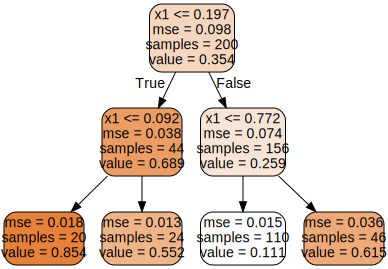

In [106]:
SVG(graph1.pipe(format='svg'))

In [107]:
graph2 = Source(export_graphviz(
        tree_reg2,
        out_file=None,
        feature_names=['x1'],
        rounded=True,
        filled=True))

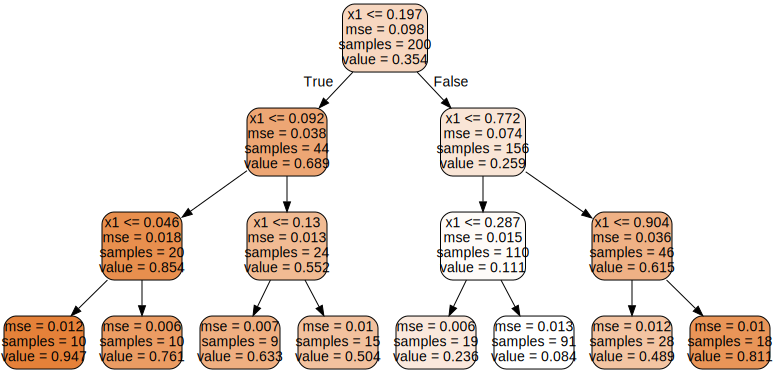

In [108]:
SVG(graph2.pipe(format='svg'))

Text(0.5,1,'max_depth=3')

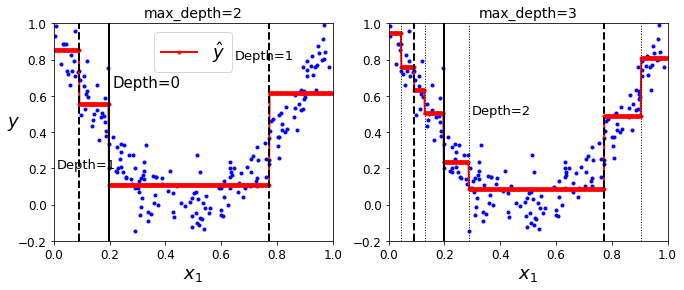

In [104]:
def plot_regression_predictions(tree_reg, X, y, axes=[0, 1, -0.2, 1], ylabel="$y$"):
    x1 = np.linspace(axes[0], axes[1], 500).reshape(-1, 1)
    y_pred = tree_reg.predict(x1)
    plt.axis(axes)
    plt.xlabel("$x_1$", fontsize=18)
    if ylabel:
        plt.ylabel(ylabel, fontsize=18, rotation=0)
    plt.plot(X, y, "b.")
    plt.plot(x1, y_pred, "r.-", linewidth=2, label=r"$\hat{y}$")

plt.figure(figsize=(11, 4))
plt.subplot(121)
plot_regression_predictions(tree_reg1, X, y)
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
plt.text(0.21, 0.65, "Depth=0", fontsize=15)
plt.text(0.01, 0.2, "Depth=1", fontsize=13)
plt.text(0.65, 0.8, "Depth=1", fontsize=13)
plt.legend(loc="upper center", fontsize=18)
plt.title("max_depth=2", fontsize=14)

plt.subplot(122)
plot_regression_predictions(tree_reg2, X, y, ylabel=None)
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
for split in (0.0458, 0.1298, 0.2873, 0.9040):
    plt.plot([split, split], [-0.2, 1], "k:", linewidth=1)
plt.text(0.3, 0.5, "Depth=2", fontsize=13)
plt.title("max_depth=3", fontsize=14)

In [113]:
# min_samples_leaf를 이용하여 규제를 한 경우
tree_reg1 = DecisionTreeRegressor(random_state=42)
tree_reg2 = DecisionTreeRegressor(random_state=42, min_samples_leaf=10)
tree_reg1.fit(X, y)
tree_reg2.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=10,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=42, splitter='best')

In [119]:
# graph1 = Source(export_graphviz(
#         tree_reg1,
#         out_file=None,
#         feature_names=['x1'],
#         rounded=True,
#         filled=True))

# SVG(graph1.pipe(format='svg'))

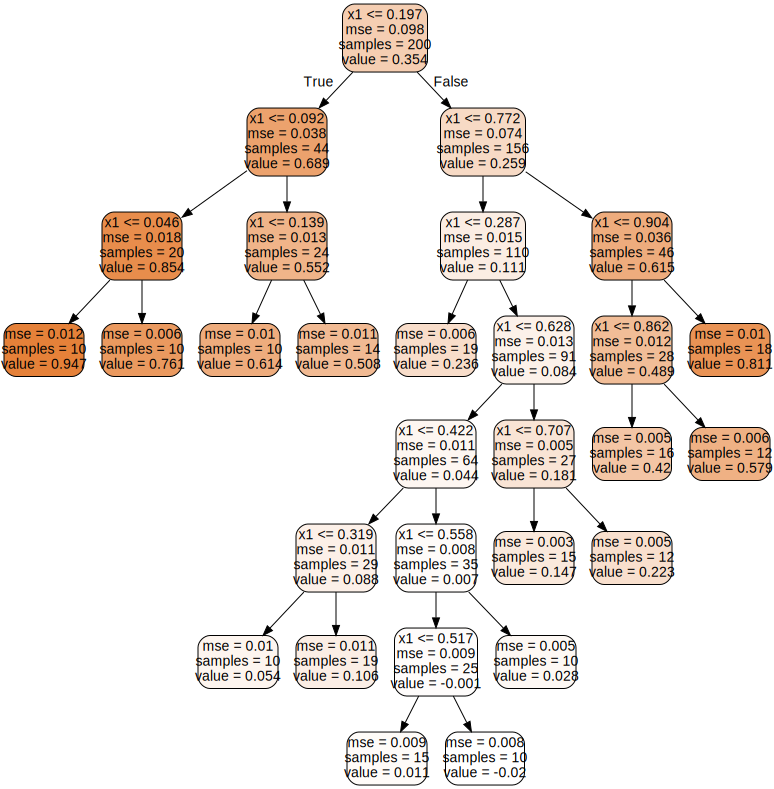

In [112]:
graph2 = Source(export_graphviz(
        tree_reg2,
        out_file=None,
        feature_names=['x1'],
        rounded=True,
        filled=True))

SVG(graph2.pipe(format='svg'))

Text(0.5,1,'min_samples_leaf=10')

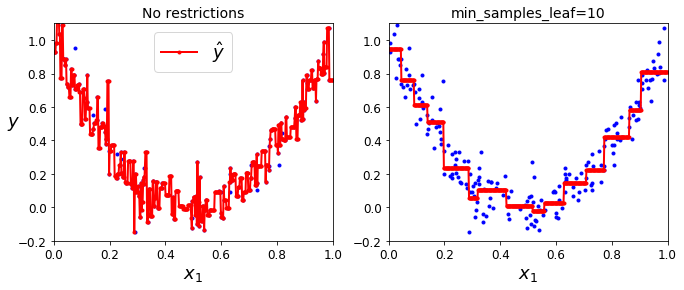

In [114]:
x1 = np.linspace(0, 1, 500).reshape(-1, 1)
y_pred1 = tree_reg1.predict(x1)
y_pred2 = tree_reg2.predict(x1)

plt.figure(figsize=(11, 4))

plt.subplot(121)
plt.plot(X, y, "b.")
plt.plot(x1, y_pred1, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([0, 1, -0.2, 1.1])
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", fontsize=18, rotation=0)
plt.legend(loc="upper center", fontsize=18)
plt.title("No restrictions", fontsize=14)

plt.subplot(122)
plt.plot(X, y, "b.")
plt.plot(x1, y_pred2, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([0, 1, -0.2, 1.1])
plt.xlabel("$x_1$", fontsize=18)
plt.title("min_samples_leaf={}".format(tree_reg2.min_samples_leaf), fontsize=14)

## Tree model 학습 및 튜닝

Moons dataset을 이용하여 학습을 한다. `make_moons(n_samples=10000, noise=0.4)`.

In [120]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=10000, noise=0.4, random_state=42)

훈련 세트와 테스트 세트로 나눈다.

In [121]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Cross-validation을 사용하여 Grid search를 수행하라(with the `GridSearchCV` class). 

`DecisionTreeClassifier` 의 하이퍼파라미터를 찾는 것을 도와준다.

In [122]:
from sklearn.model_selection import GridSearchCV

params = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4]}
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), params, n_jobs=-1, verbose=1, cv=3)

grid_search_cv.fit(X_train, y_train)

Fitting 3 folds for each of 294 candidates, totalling 882 fits


[Parallel(n_jobs=-1)]: Done 882 out of 882 | elapsed:    3.6s finished


GridSearchCV(cv=3, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99], 'min_samples_split': [2, 3, 4]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, v

In [123]:
grid_search_cv.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=17,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

Grid search를 통해 얻은 최적의 estimator의 성능을 측정한다. 이것은 아래의 코드를 이용하여 수행할 수 있다.

> Grid search를 그대로 이용

In [124]:
from sklearn.metrics import accuracy_score

y_pred = grid_search_cv.predict(X_test)
accuracy_score(y_test, y_pred)

0.8695

> Grid search에서 얻은 최적 estimator를 리턴받고, 그것을 이용

In [127]:
y_pred = grid_search_cv.best_estimator_.predict(X_test)
accuracy_score(y_test, y_pred)

0.8695